In [1]:
import numpy as np
import PIL 
import math

In [2]:
an_image = PIL.Image.open("/content/sample_data/Spectacular-Photos-of-Niagara-Falls-Casinos.jpg")

Converting the image into a numpy array

In [3]:
image_array = np.asarray(an_image)

In [4]:
print(image_array)

[[[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 [[200 231 226]
  [200 231 226]
  [200 231 226]
  ...
  [200 231 226]
  [200 231 226]
  [200 231 226]]

 ...

 [[119 125  79]
  [122 127  86]
  [134 140 102]
  ...
  [150 158 135]
  [133 141 118]
  [129 137 114]]

 [[129 127  86]
  [121 122  82]
  [100 102  65]
  ...
  [155 165 140]
  [132 142 117]
  [144 154 129]]

 [[174 191 147]
  [159 170 128]
  [145 147 108]
  ...
  [158 167 146]
  [145 154 135]
  [144 153 134]]]


In [5]:
shape = image_array.shape

(height, width, rgb)

In [6]:
print(shape)

(737, 1000, 3)


In [7]:
height = len(image_array)
width = len(image_array[0])

In [8]:
print(height)
print(width)

737
1000


In [11]:
print(image_array[0][0][2]) #blue value pixels
print(image_array[0][1][2])
print(image_array[0][2][2])

226
226
226


In [96]:
def rotate_part(old_image, top_left, bottom_right, angle, overlay):

  #get the shape, height, and width
  shape = old_image.shape
  height = len(old_image)
  width = len(old_image[0])

  #copy original pixels
  new_image = np.copy(old_image)

  #Getting all the values for each boundary to blur
  top = top_left[1]
  left = top_left[0]
  bottom = bottom_right[1]
  right = bottom_right[0]

  #checking if our coordinates are out of bounds
  if top < 0:
    print("top pixel is out of bounds")
    return 0
  if bottom > height:
    print("bottom pixel is out of bounds")
    return 0
  if left < 0:
    print("left pixel is out of bounds")
    return 0
  if right > width:
    print("right pixel is out of bounds")
    return 0

  #checking if our coordinates make sense
  if top >= bottom:
    print("top pixel must be less than bottom pixel")
    return 0
  if left >= right:
    print("left pixel must be less than right pixel")
    return 0

  #angle simplified
  if angle >= 0:
    angle = angle % 360
  else:
    angle = (360 - angle) % 360

  #angle converted from degree to radian
  angle = (angle * math.pi) /180

  middle_width_part = ((right-1) - left)/2  + left
  middle_height_part = ((bottom - 1) - top)/2 + top

  #moves image, leaves previous spot black
  if overlay == 0:

    #Making previous spot black
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          new_image[y][x][rgb] = 0

    #Rotating the spot with respect to it's middle section
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          x_rotate = int(math.cos(angle)*(x-middle_width_part) + math.sin(angle)*(y-middle_height_part) + middle_width_part)
          y_rotate = int(-math.sin(angle)*(x-middle_width_part) + math.cos(angle)*(y-middle_height_part) + middle_height_part)
          if x_rotate >= 0 and x_rotate < width and y_rotate >= 0 and y_rotate < height:
            new_image[y_rotate][x_rotate][rgb] = old_image[y][x][rgb]
          

    return new_image

  #moves image, leaves previous spot same as before, but with original on top
  elif overlay == 1:

    #Rotating the spot with respect to it's middle section
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          x_rotate = int(math.cos(angle)*(x-middle_width_part) + math.sin(angle)*(y-middle_height_part) + middle_width_part)
          y_rotate = int(-math.sin(angle)*(x-middle_width_part) + math.cos(angle)*(y-middle_height_part) + middle_height_part)
          if x_rotate >= 0 and x_rotate < width and y_rotate >= 0 and y_rotate < height:
            new_image[y_rotate][x_rotate][rgb] = old_image[y][x][rgb]

    #Putting the original part back, in case it has been overlapped
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          new_image[y][x][rgb] = old_image[y + top][x + left][rgb]

    return new_image

  #moves image, leaves previous spot same as before, but with new on top
  elif overlay == 2:

    #Rotating the spot with respect to it's middle section
    for y in range(top,bottom):
      for x in range(left,right):
        for rgb in range(3):
          x_rotate = int(math.cos(angle)*(x-middle_width_part) + math.sin(angle)*(y-middle_height_part) + middle_width_part)
          y_rotate = int(-math.sin(angle)*(x-middle_width_part) + math.cos(angle)*(y-middle_height_part) + middle_height_part)
          if x_rotate >= 0 and x_rotate < width and y_rotate >= 0 and y_rotate < height:
            new_image[y_rotate][x_rotate][rgb] = old_image[y][x][rgb]

    return new_image



**Underneath is testing**

In [97]:
new_image = rotate_part(image_array,(0,0),(300,300),45,0)

Black background where image used to be

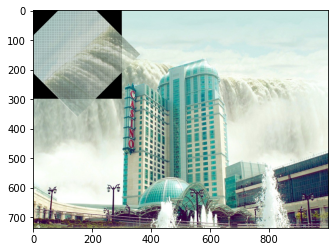

In [98]:
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.show()

original background on top

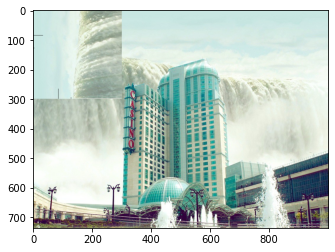

In [99]:
new_image = rotate_part(image_array,(0,0),(300,300),90,0)
plt.imshow(new_image)
plt.show()

old background on top

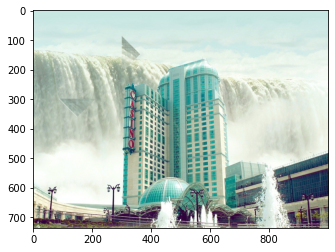

In [101]:
new_image = rotate_part(image_array,(0,0),(300,300),45,1)
plt.imshow(new_image)
plt.show()

Rotating every 45 degrees

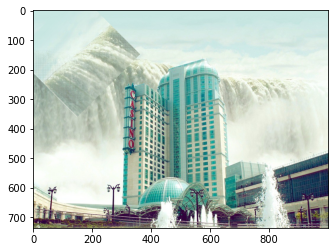

In [102]:
new_image = rotate_part(image_array,(0,0),(300,300),45,2)
plt.imshow(new_image)
plt.show()

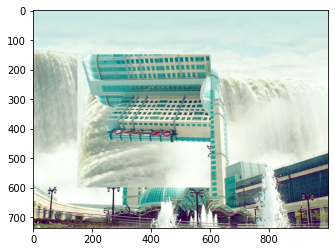

In [103]:
new_image = rotate_part(image_array,(150,150),(600,600),90,2)
plt.imshow(new_image)
plt.show()

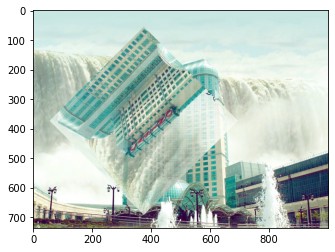

In [104]:
new_image = rotate_part(image_array,(150,150),(600,600),135,2)
plt.imshow(new_image)
plt.show()

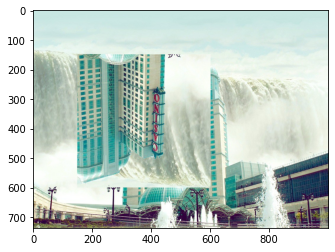

In [105]:
new_image = rotate_part(image_array,(150,150),(600,600),180,2)
plt.imshow(new_image)
plt.show()

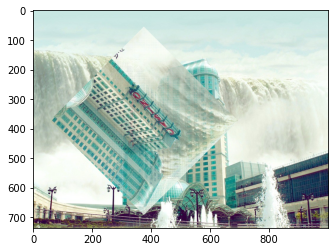

In [106]:
new_image = rotate_part(image_array,(150,150),(600,600),225,2)
plt.imshow(new_image)
plt.show()

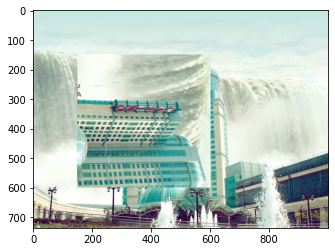

In [107]:
new_image = rotate_part(image_array,(150,150),(600,600),270,2)
plt.imshow(new_image)
plt.show()

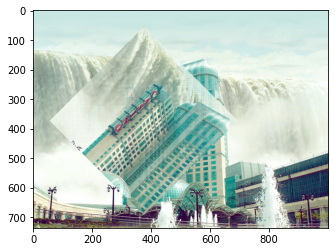

In [108]:
new_image = rotate_part(image_array,(150,150),(600,600),315,2)
plt.imshow(new_image)
plt.show()

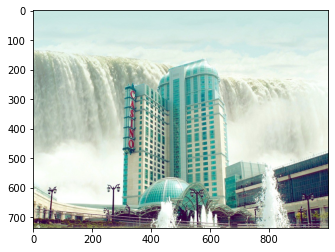

In [109]:
new_image = rotate_part(image_array,(150,150),(600,600),360,2)
plt.imshow(new_image)
plt.show()

Checking negative case

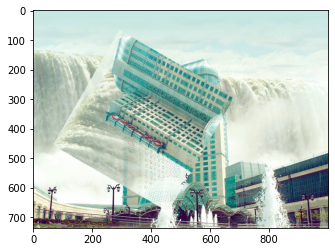

In [110]:
new_image = rotate_part(image_array,(150,150),(600,600),-60,2)
plt.imshow(new_image)
plt.show()

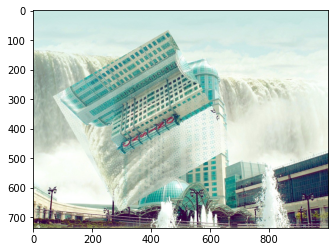

In [111]:
new_image = rotate_part(image_array,(150,150),(600,600),-120,2)
plt.imshow(new_image)
plt.show()

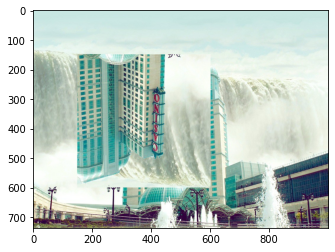

In [112]:
new_image = rotate_part(image_array,(150,150),(600,600),-180,2)
plt.imshow(new_image)
plt.show()

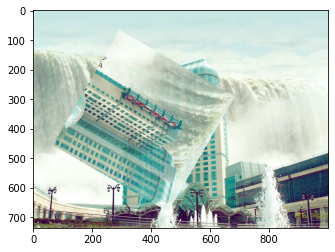

In [113]:
new_image = rotate_part(image_array,(150,150),(600,600),-240,2)
plt.imshow(new_image)
plt.show()

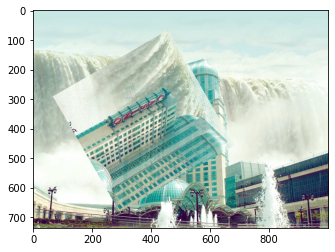

In [114]:
new_image = rotate_part(image_array,(150,150),(600,600),-300,2)
plt.imshow(new_image)
plt.show()

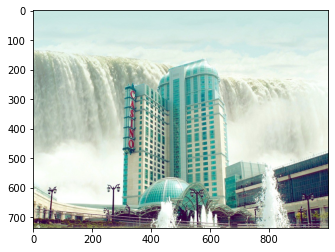

In [115]:
new_image = rotate_part(image_array,(150,150),(600,600),-360,2)
plt.imshow(new_image)
plt.show()

original image

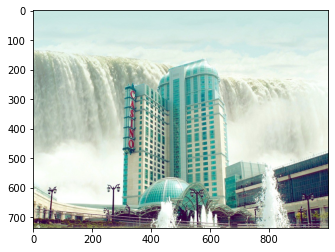

In [116]:
plt.imshow(image_array)
plt.show()